In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [49]:
train = pd.read_csv('train.csv')

In [50]:
test = pd.read_csv('test.csv')

In [51]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [52]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [53]:
pd.set_option('display.max_columns', None)

### To Do 

+ Fill na
+ Embarked : Most Frequent
+ Age : Mean

+ Family_member = Sib + Parch
+ Cabin : Have cabin, select letter from cabin, count of Letter(not do now)
+ Target Encoding
+ Age:
    + Cut
    + Log
+ Ticket number: Value count/ Prefix / number
    + Prefix: values count, target encoding
    + Number: values count
    + Ticket: values count
+ Fare:
    + Log
+ Sib : Have Sib
+ Parch : Have Parch

In [54]:
import sklearn
from sklearn.impute import SimpleImputer

In [55]:
def age_cut(x):
    if(x>=0 and x<=14):
        return 'Child'
    elif(x>=15 and x <= 24):
        return 'Youth'
    elif(x>=15 and x <= 60):
        return 'Adult'
    else:
        return 'Senior'
    
#select prefix in Ticket
import re
def divide_dig(x):
    pat_dig = '[0-9]+'
    
    dig = re.search(pat_dig, x)
    if dig is None:
        return -1
    else:
        return dig[0]

# select postfix in Ticket
def divide_let(x):
    pat_let = '[^0-9]+'
    let = re.search(pat_let, x)
    if let is None:
        return np.nan
    else:
        return let[0]
    
import re
def select_title(x):
    pattern = '([A-Za-z]*?)\.'
    result = re.search(pattern, x)
    return result[0][:-1]

In [56]:
## Check every col in the train frame and fill na
## Numeric and object have different methods
## comment above to be deleted
imputer_emb = SimpleImputer(strategy = 'most_frequent')
train['Age'] = train['Age'].fillna(np.mean(train['Age']))
imputer_emb.fit(train[['Embarked']])
train[['Embarked']] = imputer_emb.transform(train[['Embarked']])

## Have Cabin
train['have_Cabin'] = train['Cabin'].isna().apply(lambda x: 1 if x== True else 0)

## Select letter
train['letter_Cabin'] = train['Cabin'].fillna('U').apply(lambda x: x[:1])

## Age- Cut
train['Age_cut'] = train['Age'].apply(age_cut)
## Age Log
train['Age_Log'] = np.log(train['Age'])

## Ticket- Value count
train['Ticket_full_counts'] = train['Ticket'].map(train['Ticket'].value_counts())

## Ticket- select prefix
train['Ticket_let'] = train['Ticket'].apply(divide_let).fillna('U')
train['Ticket_let_counts'] = train['Ticket_let'].map(train['Ticket_let'].value_counts())
## Ticket- select Numbers
train['Ticket_Num'] = train['Ticket'].apply(divide_dig)
train['Ticket_Num_counts'] = train['Ticket_Num'].map(train['Ticket_Num'].value_counts())
## Family member
train['Fam_mem'] = train['SibSp'] + train['Parch'] + 1

## Log Fare
train['Fare_Log'] = np.log(train['Fare'])

D:\Anaconda\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [57]:
replace = {
    'Mr': 'Mr',
    'Mrs': 'Mrs',
    'Miss': 'Miss',
    'Ms': 'Ms',
    'Jonkheer': 'Other',
    'Countess':'Ms',
    'Capt': 'Other',
    'Don': 'Mr',
    'Major' : 'Other',
    'Mlle': 'Miss',
    'Mme' : 'Mrs',
    'Lady':'Mrs',
    'Col': 'Other',
    'Dr': 'Mr',
    'Master': 'Mr',
    'Sir': 'Mr',
    'Rev' : 'Other',
}
train['Title'] = train['Name'].apply(select_title).map(replace)

In [58]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,have_Cabin,letter_Cabin,Age_cut,Age_Log,Ticket_full_counts,Ticket_let,Ticket_let_counts,Ticket_Num,Ticket_Num_counts,Fam_mem,Fare_Log,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,U,Youth,3.091042,1,A/,23,5,21,2,1.981001,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,C,Adult,3.637586,1,PC,60,17599,1,2,4.266662,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,U,Adult,3.258097,1,STON/O,6,2,20,1,2.070022,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,C,Adult,3.555348,2,U,661,113803,2,2,3.972177,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,U,Adult,3.555348,1,U,661,373450,1,1,2.085672,Mr


In [59]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'have_Cabin',
       'letter_Cabin', 'Age_cut', 'Age_Log', 'Ticket_full_counts',
       'Ticket_let', 'Ticket_let_counts', 'Ticket_Num', 'Ticket_Num_counts',
       'Fam_mem', 'Fare_Log', 'Title'],
      dtype='object')

### Prepare test data

In [61]:
# Fill missing value in Age Fare and Cabin

test['Age'] = test['Age'].fillna(test['Age'].mean())
test['Fare'] = test['Fare'].fillna(test['Fare']).mean()


test['have_Cabin'] = test['Cabin'].isna().apply(lambda x: 1 if x== True else 0)

## Select letter
test['letter_Cabin'] = test['Cabin'].fillna('U').apply(lambda x: x[:1])

## Age- Cut
test['Age_cut'] = test['Age'].apply(age_cut)
## Age Log
test['Age_Log'] = np.log(test['Age'])

## Ticket- Value count
test['Ticket_full_counts'] = test['Ticket'].map(test['Ticket'].value_counts())

## Ticket- select prefix
test['Ticket_let'] = test['Ticket'].apply(divide_let).fillna('U')
test['Ticket_let_counts'] = test['Ticket_let'].map(test['Ticket_let'].value_counts())
## Ticket- select Numbers
test['Ticket_Num'] = test['Ticket'].apply(divide_dig)
test['Ticket_Num_counts'] = test['Ticket_Num'].map(test['Ticket_Num'].value_counts())
## Family member
test['Fam_mem'] = test['SibSp'] + test['Parch'] + 1

## Log Fare
test['Fare_Log'] = np.log(test['Fare'])



In [62]:
test['Title'] = test['Name'].apply(select_title).map(replace).fillna('Other')

In [15]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,have_Cabin,letter_Cabin,Age_cut,Age_Log,Ticket_full_counts,Ticket_let,Ticket_let_counts,Ticket_Num,Ticket_Num_counts,Fam_mem,Fare_Log,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,35.627188,NaN,Q,1,U,Adult,3.540959,1,U,296,330911,1,1,3.573109,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,35.627188,NaN,S,1,U,Adult,3.850148,1,U,296,363272,1,2,3.573109,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,35.627188,NaN,Q,1,U,Senior,4.127134,1,U,296,240276,1,1,3.573109,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,35.627188,NaN,S,1,U,Adult,3.295837,1,U,296,315154,1,1,3.573109,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,35.627188,NaN,S,1,U,Youth,3.091042,1,U,296,3101298,1,3,3.573109,Mrs


### Run models with new features(do not encode Ticket and Ticket letter and ticker number and Cabin)

In [86]:
to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Ticket_let', 'Ticket_Num', 'Age', 'Fare']
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,have_Cabin,letter_Cabin,Age_cut,Age_Log,Ticket_full_counts,Ticket_let,Ticket_let_counts,Ticket_Num,Ticket_Num_counts,Fam_mem,Fare_Log,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,U,Youth,3.091042,1,A/,23,5,21,2,1.981001,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,C,Adult,3.637586,1,PC,60,17599,1,2,4.266662,Mrs


In [87]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

#Encoding categorical features
#train
to_encode = ['Pclass','Sex', 'letter_Cabin', 'Age_cut', 'Title', 'Embarked']
ode = OrdinalEncoder()

train1 = train.drop(columns=to_drop)
test1 = test.drop(columns=to_drop)

ode.fit(train1[to_encode])
train1[to_encode] = ode.transform(train1[to_encode])
test1[to_encode] = ode.transform(test1[to_encode])

X_train1 = train1.drop(columns=['Survived'])
y_train1 = train1['Survived']

X_test1 = test1.copy()

In [88]:
# Run models
import lightgbm as lgb
params = {'boosting_type': 'gbdt', 'objective': 'binary', 'n_estimators':200,
              'num_leaves': 100, 'learning_rate': 0.01, 'max_bin': 512, 
              'subsample_for_bin': 200, 'subsample': 1, 'subsample_freq': 1,
              'colsample_bytree': 0.8, 'reg_alpha': 5, 'reg_lambda': 10, 'metric': 'binary_logloss'}

lgbm = lgb.LGBMClassifier(**params)
lgbm.fit(X_train1, y_train1, categorical_feature=to_encode, eval_set=[(X_train1, y_train1)], early_stopping_rounds=20)
y_pred = lgbm.predict(X_test1)
sub = pd.DataFrame(test['PassengerId'])
sub['Survived'] = y_pred
sub.to_csv('Submission_only_featureEngi.csv',index=False)

[1]	training's binary_logloss: 0.662754
[2]	training's binary_logloss: 0.659383
[3]	training's binary_logloss: 0.65607
[4]	training's binary_logloss: 0.652843
[5]	training's binary_logloss: 0.64993
[6]	training's binary_logloss: 0.646804
[7]	training's binary_logloss: 0.64387
[8]	training's binary_logloss: 0.640987
[9]	training's binary_logloss: 0.638119
[10]	training's binary_logloss: 0.635298
[11]	training's binary_logloss: 0.632411
[12]	training's binary_logloss: 0.629549
[13]	training's binary_logloss: 0.626781
[14]	training's binary_logloss: 0.624142
[15]	training's binary_logloss: 0.621416
[16]	training's binary_logloss: 0.618863
[17]	training's binary_logloss: 0.616236
[18]	training's binary_logloss: 0.613902
[19]	training's binary_logloss: 0.611574
[20]	training's binary_logloss: 0.609176
[21]	training's binary_logloss: 0.606822
[22]	training's binary_logloss: 0.604507
[23]	training's binary_logloss: 0.602316
[24]	training's binary_logloss: 0.599944
[25]	training's binary_loglo

D:\Anaconda\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
D:\Anaconda\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


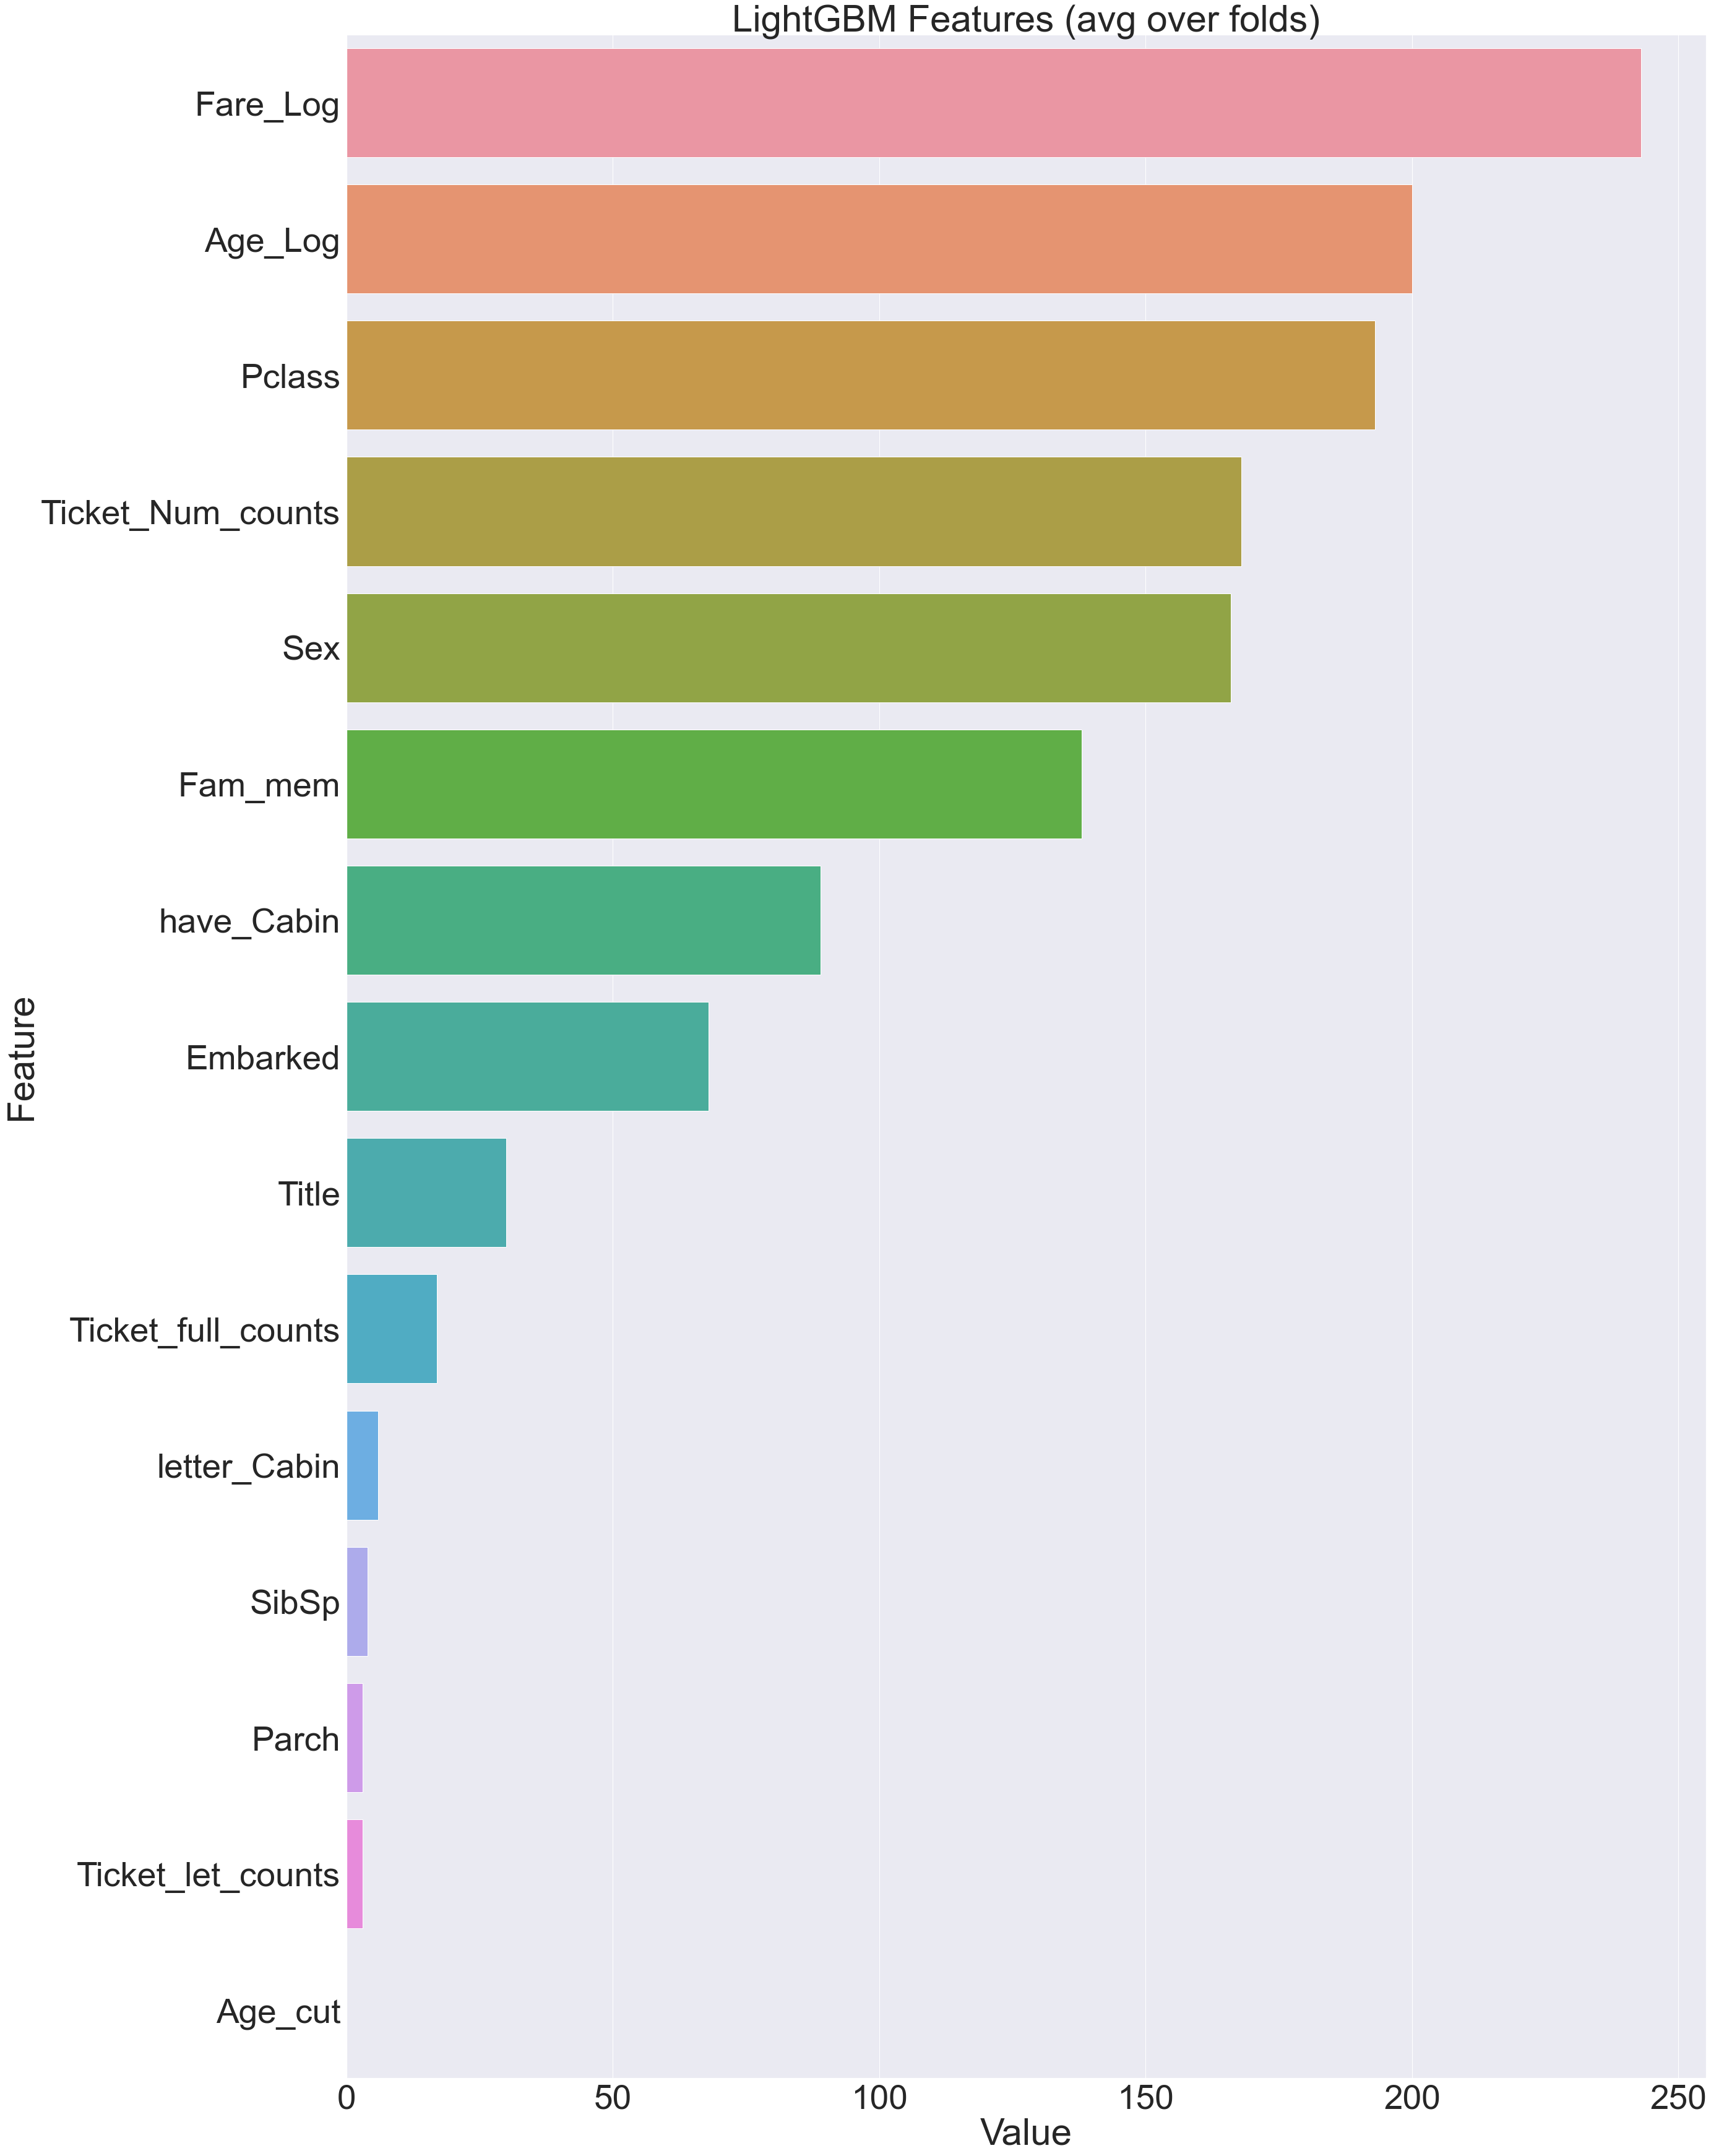

In [89]:
import seaborn as sns
def plotImp(model, X , num = 20, fig_size = (40, 50)):
    feature_imp = pd.DataFrame({'Value':model.feature_importances_,'Feature':X.columns})
    plt.figure(figsize=fig_size)
    sns.set(font_scale = 5)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", 
                                                        ascending=False)[0:num])
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    plt.savefig('lgbm_importances-01.png')
    plt.show()
    
plotImp(lgbm, X_train1)

In [79]:
def name_OneHotMatrix(df, cols):
    names = []
    for col in cols:
        for i in range(df[col].nunique()):
            names.append(col+'_'+str(i))
    return names

In [80]:
ohe = OneHotEncoder()

ohe.fit(train1[to_encode])

train1_mat = ohe.transform(train1[to_encode]).toarray()
names = name_OneHotMatrix(train1, to_encode)
train1_mat = pd.DataFrame(train1_mat, columns=names)
train1 = pd.concat([train1.drop(columns=to_encode), train1_mat], axis=1)

test1_mat = ohe.transform(test1[to_encode]).toarray()
test1_mat = pd.DataFrame(test1_mat, columns=names)
test1 = pd.concat([test1.drop(columns=to_encode), test1_mat], axis=1)

X_train1 = train1.drop(columns=['Survived'])
y_train1 = train1['Survived']

X_test1 = test1.copy()

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier()

param_grid_rf = {'n_estimators': np.arange(50, 500, 50),
                'max_depth': np.arange(4, 14, 2),
                'min_samples_split': np.arange(2, 20),
                'max_features':[0.6, 0.7, 0.8, 0.9]}

rf_rand = RandomizedSearchCV(rf, param_distributions=param_grid_rf, n_jobs=3, cv=5)
import sklearn
from unittest import mock
with mock.patch("sklearn.utils.validation._assert_all_finite"):
    rf_rand.fit(X_train1, y_train1)
y_pred = rf_rand.predict(X_test1)

sub = pd.DataFrame(test['PassengerId'])
sub['Survived'] = y_pred
sub.to_csv('Submission_onlyFE_rf.csv',index=False)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


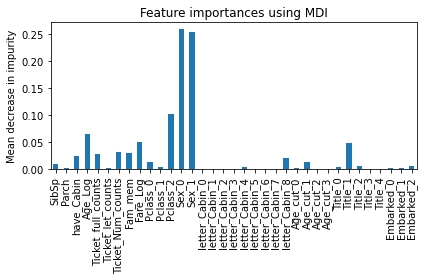

In [85]:
rf_ = rf_rand.best_estimator_

importances = rf_.feature_importances_
feature_names = [feature_name for feature_name in X_train1.columns]
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

### To be done

+ To be encoded:
    + dummy or one hot: Sex, Pclass, have_Cabin, Letter_Cabin, letter_Cabin, Age_cut, Ticket_let
+ Need to be dropped:
    + PassengerId, Cabin, Ticket, Ticket_Num, Age(have log), Fare(have log)
+ Use standard scaler
+ Interaction terms

+ One thing do not forget: Model Selection

### GBDT + LR

In [18]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,have_Cabin,letter_Cabin,Age_cut,Age_Log,Ticket_full_counts,Ticket_let,Ticket_let_counts,Ticket_Num,Ticket_Num_counts,Fam_mem,Fare_Log,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,1,U,Youth,3.091042,1,A/,23,5,21,2,1.981001,Mr


+ In case some categories in test are not in train, cope with the test set first

In [63]:

TickLet_rep = {
    'STON/O' : 'STON', 'SOTON/OQ ' : 'STON', 'STON/O ': 'STON', 'SOTON/O.Q. ':'STON',
    'SOTON/O' : 'STON', 'A/' : 'A', 'A./':'A', 'A/S' : 'A', 'A.':'A', 'A/S ':'A',
    'PC ': 'PC', 
    'SC/Paris ': 'SC', 'S.C./A.':'SC', 'SC/PARIS ': 'SC', 'SC ':'SC', 'SC/AH': 'SC',
    'SC/AH ': 'SC', 'SC/AH Basle ': 'SC', 'S.C./PARIS ':'SC', 'C.A. ': 'CA',
    'CA ': 'CA', 'CA. ': 'CA', 'C.A./SOTON ': 'CA', 'S.O.C. ' : 'SOC', 'SO/C ': 'SOC',
    'SCO/W ': 'SOC', 'S.O./P.P. ': 'SOC', 'F.C.C. ': 'F.C. ', 'W./C. ':'W/C ',
    'SW/PP ': 'S.W./PP ', 'W.E.P. ': 'WE/P '
}

TickLet_map = {
    'A' : 'A',
    'PC' : 'PC',
    'STON' : 'STON',
    'U' : 'U',
    'PP ': 'PP',
    'CA': 'CA', 'SC': 'SC', 'S.P. ': 'SP', 'SOC': 'SOC', 'W/C ': 'WC', 
    'WE/P ': 'WEP', 'C ': 'C', 'S.O.P. ': 'SOP', 
}
train['Ticket_let'] = train['Ticket_let'].replace(TickLet_rep).map(TickLet_map).fillna('U')
test['Ticket_let'] = test['Ticket_let'].replace(TickLet_rep).map(TickLet_map).fillna('U')

train['Ticket_let_counts'] = train['Ticket_let'].map(train['Ticket_let'].value_counts())
test['Ticket_let_counts'] = test['Ticket_let'].map(test['Ticket_let'].value_counts())

+ using lgbt with 100 trees and 64 leaves

In [76]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,have_Cabin,letter_Cabin,Age_cut,Age_Log,Ticket_full_counts,Ticket_let,Ticket_let_counts,Ticket_Num,Ticket_Num_counts,Fam_mem,Fare_Log,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,1,U,Youth,3.091042,1,A,29,5,21,2,1.981001,Mr


In [79]:
X_train

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,have_Cabin,letter_Cabin,Age_cut,Age_Log,Ticket_full_counts,Ticket_let,Ticket_let_counts,Ticket_Num,Ticket_Num_counts,Fam_mem,Fare_Log,Title
0,1,3,1.0,22.000000,1,0,7.2500,2.0,1,8.0,3.0,3.091042,1,0.0,29,5,21,2,1.981001,1.0
1,2,1,0.0,38.000000,1,0,71.2833,0.0,0,2.0,0.0,3.637586,1,2.0,60,17599,1,2,4.266662,2.0
2,3,3,0.0,26.000000,0,0,7.9250,2.0,1,8.0,0.0,3.258097,1,5.0,35,2,20,1,2.070022,0.0
3,4,1,0.0,35.000000,1,0,53.1000,2.0,0,2.0,0.0,3.555348,2,6.0,699,113803,2,2,3.972177,2.0
4,5,3,1.0,35.000000,0,0,8.0500,2.0,1,8.0,0.0,3.555348,1,6.0,699,373450,1,1,2.085672,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,1.0,27.000000,0,0,13.0000,2.0,1,8.0,0.0,3.295837,1,6.0,699,211536,1,1,2.564949,4.0
887,888,1,0.0,19.000000,0,0,30.0000,2.0,0,1.0,3.0,2.944439,1,6.0,699,112053,1,1,3.401197,0.0
888,889,3,0.0,29.699118,1,2,23.4500,2.0,1,8.0,0.0,3.391117,2,6.0,699,6607,2,4,3.154870,0.0
889,890,1,1.0,26.000000,0,0,30.0000,0.0,0,2.0,0.0,3.258097,1,6.0,699,111369,1,1,3.401197,1.0


In [80]:
X_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,have_Cabin,letter_Cabin,Age_cut,Age_Log,Ticket_full_counts,Ticket_let,Ticket_let_counts,Ticket_Num,Ticket_Num_counts,Fam_mem,Fare_Log,Title
0,892,3,1.0,34.50000,0,0,35.627188,1.0,1,8.0,0.0,3.540959,1,6.0,309,330911,1,1,3.573109,1.0
1,893,3,0.0,47.00000,1,0,35.627188,2.0,1,8.0,0.0,3.850148,1,6.0,309,363272,1,2,3.573109,2.0
2,894,2,1.0,62.00000,0,0,35.627188,1.0,1,8.0,2.0,4.127134,1,6.0,309,240276,1,1,3.573109,1.0
3,895,3,1.0,27.00000,0,0,35.627188,2.0,1,8.0,0.0,3.295837,1,6.0,309,315154,1,1,3.573109,1.0
4,896,3,0.0,22.00000,1,1,35.627188,2.0,1,8.0,3.0,3.091042,1,6.0,309,3101298,1,3,3.573109,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,1.0,30.27259,0,0,35.627188,2.0,1,8.0,0.0,3.410243,1,0.0,10,5,7,1,3.573109,1.0
414,1306,1,0.0,39.00000,0,0,35.627188,0.0,0,2.0,0.0,3.663562,1,2.0,32,17758,1,1,3.573109,4.0
415,1307,3,1.0,38.50000,0,0,35.627188,2.0,1,8.0,0.0,3.650658,1,5.0,13,3101262,1,1,3.573109,1.0
416,1308,3,1.0,30.27259,0,0,35.627188,2.0,1,8.0,0.0,3.410243,1,6.0,309,359309,1,1,3.573109,1.0


In [96]:
import lightgbm as lgb
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

X_train = train.drop(columns=['Survived', 'Name', 'Ticket', 'Cabin', 'PassengerId'])
y_train = train['Survived']
X_test = test.copy().drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId'])

X_train['Ticket_Num'] = X_train['Ticket_Num'].astype(str)
X_test['Ticket_Num'] = X_test['Ticket_Num'].astype(str)

cat_features = ['letter_Cabin', 'Age_cut', 'Ticket_let','Ticket_Num',
                'Title', 'Sex', 'Embarked', 'letter_Cabin', 'Title','Pclass']

ode = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)
ode.fit(X_train[cat_features])
X_train[cat_features] = ode.transform(X_train[cat_features])
X_test[cat_features] = ode.transform(X_test[cat_features])

params = {'boosting_type': 'gbdt', 'objective': 'binary', 'num_trees': 100,
              'num_leaves': 64, 'learning_rate': 0.01, 'max_bin': 512, 
              'subsample_for_bin': 200, 'subsample': 1, 'subsample_freq': 1,
              'colsample_bytree': 0.8, 'reg_alpha': 5, 'reg_lambda': 10, 'metric': 'binary_logloss'}

num_leaf=64

lgbm = lgb.LGBMClassifier(**params)
lgbm.fit(X_train, y_train, eval_set=[(X_train, y_train)], categorical_feature=cat_features, early_stopping_rounds=20)

[LightGBM] [Warning] num_iterations is set=100, num_trees=100 will be ignored. Current value: num_iterations=100
[1]	training's binary_logloss: 0.662682
[2]	training's binary_logloss: 0.659311
[3]	training's binary_logloss: 0.656027
[4]	training's binary_logloss: 0.652959
[5]	training's binary_logloss: 0.650139
[6]	training's binary_logloss: 0.647368
[7]	training's binary_logloss: 0.646069
[8]	training's binary_logloss: 0.642982
[9]	training's binary_logloss: 0.641692
[10]	training's binary_logloss: 0.638702
[11]	training's binary_logloss: 0.635756
[12]	training's binary_logloss: 0.633015
[13]	training's binary_logloss: 0.630302
[14]	training's binary_logloss: 0.627636
[15]	training's binary_logloss: 0.625066
[16]	training's binary_logloss: 0.622314
[17]	training's binary_logloss: 0.619623
[18]	training's binary_logloss: 0.616972
[19]	training's binary_logloss: 0.614349
[20]	training's binary_logloss: 0.611767
[21]	training's binary_logloss: 0.609435
[22]	training's binary_logloss: 0.6

D:\Anaconda\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
D:\Anaconda\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
D:\Anaconda\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


LGBMClassifier(colsample_bytree=0.8, learning_rate=0.01, max_bin=512,
               metric='binary_logloss', num_leaves=64, num_trees=100,
               objective='binary', reg_alpha=5, reg_lambda=10, subsample=1,
               subsample_for_bin=200, subsample_freq=1)

In [97]:
y_pred_tr = lgbm.predict(X_train, pred_leaf=True)
y_pred_te = lgbm.predict(X_test, pred_leaf=True)

In [98]:
print('Writing transformed training data')
transformed_training_matrix = np.zeros([len(y_pred_tr), len(y_pred_tr[0]) * num_leaf],
                                       dtype=np.int64)  # N * num_tress * num_leafs
for i in range(0, len(y_pred_tr)):
    temp = np.arange(len(y_pred_tr[0])) * num_leaf + np.array(y_pred_tr[i])
    transformed_training_matrix[i][temp] += 1
    
    
print('Writing transformed testing data')
transformed_testing_matrix = np.zeros([len(y_pred_te), len(y_pred_te[0]) * num_leaf], dtype=np.int64)
for i in range(0, len(y_pred_te)):
    temp = np.arange(len(y_pred_te[0])) * num_leaf + np.array(y_pred_te[i])
    transformed_testing_matrix[i][temp] += 1

Writing transformed training data
Writing transformed testing data


In [99]:
from sklearn.linear_model import LogisticRegression

lm = LogisticRegression(penalty='l2',C=0.05)
lm.fit(transformed_training_matrix,y_train)
y_pred_test = lm.predict(transformed_testing_matrix)

submit(y_pred_test, 'gbdt+lr')

In [91]:
def submit(y_pred, name):
    sub = pd.DataFrame(test['PassengerId'])
    sub['Survived'] = y_pred
    sub.to_csv(name + '.csv',index=False)

## Target Encoding

In [145]:
train2 = train.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId'])
test2 = test.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId'])

In [146]:
from sklearn.model_selection import StratifiedKFold
#target encoding
def target_enc(df, cols, target):
    X, y = df[cols], df[target]
    skf = StratifiedKFold(n_splits=5, shuffle=True)
    target_mean_features = []
    for col in cols:
        colname = col + '_target_mean'
        target_mean_features.append(colname)
        df[colname] = 0
    for tr_idx, val_idx in skf.split(X,y):
        X_train, X_val = df.iloc[tr_idx], df.iloc[val_idx]
        for col in cols:
            mean = X_train.groupby(by=col)[target].mean()
            df[col+'_target_mean'].iloc[val_idx] = X_val[col].map(mean)
    prior = df[target].mean()
    df[target_mean_features].fillna(prior, inplace=True)
    
    
    #regularization on target encoding
    
    for feature in target_mean_features:
        df[feature] = df[feature] * len(df) + df[feature].nunique() * prior
        df[feature] = df[feature] / (len(df) + df[feature].nunique())
    return df[target_mean_features]

In [137]:
target = 'Survived'
features_target_enc = ['Age_cut', 'Ticket_let','Ticket_Num',
                'Sex', 'Embarked', 'letter_Cabin', 'Title','Pclass']

train2_mean_matrix= target_enc(train2, features_target_enc, 'Survived')
train2_mean_matrix.fillna(train[target].mean(), inplace=True)
enc_dict = {}
for i in range(len(features_target_enc)):
    feature = features_target_enc[i]
    feature_mean = feature + '_target_mean'
    print(feature_mean)
    enc_dict[feature] = {}
    for f1, f2 in zip(train2[feature].unique(), train2_mean_matrix[feature_mean].unique()):
        enc_dict[feature][f1] = f2

train2 = pd.concat([train2.drop(columns=features_target_enc), train2_mean_matrix], axis=1)

for feature in features_target_enc:
    test2[feature + '_mean_target'] = test2[feature].map(enc_dict[feature]).fillna(train2[target].mean())

test2 = test2.drop(columns=features_target_enc)

In [158]:
X_train2 = train2.drop(columns=['Survived'])
y_train2 = train2['Survived']
lgbm_mt = lgb.LGBMClassifier(**params)
lgbm_mt.fit(X_train2, y_train2, eval_set=[(X_train2, y_train2)], early_stopping_rounds=20)
y_pred = lgbm_mt.predict(test2)

[LightGBM] [Warning] num_iterations is set=100, num_trees=100 will be ignored. Current value: num_iterations=100
[1]	training's binary_logloss: 0.662509
[2]	training's binary_logloss: 0.659325
[3]	training's binary_logloss: 0.655965
[4]	training's binary_logloss: 0.652716
[5]	training's binary_logloss: 0.649457
[6]	training's binary_logloss: 0.646254
[7]	training's binary_logloss: 0.643179
[8]	training's binary_logloss: 0.640163
[9]	training's binary_logloss: 0.637196
[10]	training's binary_logloss: 0.63408
[11]	training's binary_logloss: 0.631016
[12]	training's binary_logloss: 0.628192
[13]	training's binary_logloss: 0.62523
[14]	training's binary_logloss: 0.622301
[15]	training's binary_logloss: 0.619571
[16]	training's binary_logloss: 0.616843
[17]	training's binary_logloss: 0.614046
[18]	training's binary_logloss: 0.611405
[19]	training's binary_logloss: 0.608693
[20]	training's binary_logloss: 0.606035
[21]	training's binary_logloss: 0.603406
[22]	training's binary_logloss: 0.600

D:\Anaconda\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
D:\Anaconda\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_trees` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


In [159]:
submit(y_pred, 'target_mean+lgbm')

In [161]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier()

param_grid_rf = {'n_estimators': np.arange(50, 500, 50),
                'max_depth': np.arange(4, 14, 2),
                'min_samples_split': np.arange(2, 20),
                'max_features':[0.6, 0.7, 0.8, 0.9]}

rf_rand = RandomizedSearchCV(rf, param_distributions=param_grid_rf, n_jobs=3, cv=5)
import sklearn
from unittest import mock
with mock.patch("sklearn.utils.validation._assert_all_finite"):
    rf_rand.fit(X_train2, y_train2)
y_pred = rf_rand.predict(test2)

submit(y_pred, 'target_mean + rf')

D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


To do:

+ Select features
+ parameter tuning
+ add interactive terms manually

### Parameter Tuning